<a href="https://colab.research.google.com/github/aliss153/Aprendizaje-Automatico/blob/main/2-Ejercicios/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Máquinas de soporte vectorial
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Alisson Manosalvas &bull; 01 Ene 2026
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de máquinas de soporte vectorial (SVM) para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [24]:
# Paquetes necesarios
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización

from sklearn.preprocessing import StandardScaler  # Estandarización de datos
from sklearn.datasets import make_blobs, make_circles # Creación de datos
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Métrica de evaluación

# Algoritmo SVC
from sklearn.svm import SVC

# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

**- Muestra algunos datos.**

In [3]:
url_data = "https://raw.githubusercontent.com/aliss153/Aprendizaje-Automatico/main/Country-data.csv"
df = pd.read_csv(url_data)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


**- Muestra una descripción de los datos.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


**- Escalar los datos si es necesario.**

In [6]:
numeric_cols = df.drop(columns=['country']).columns
numeric_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[numeric_cols])
df_scaled = pd.DataFrame(scaled_values, columns=numeric_cols)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817



### <font color='264CC7'> Determinación del mejor kernel </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el mejor kernel para el modelo SVM.
<ul>
  <li>Genera una gráfica que muestre la precisión de los modelos con diferentes kernels.</li>
  <li>Selecciona el mejor kernel.</li>
</ul>
</div>


**- Genera una gráfica que muestre la precisión de los modelos con diferentes kernels.**

En este caso, mi dataset no cuenta con variable categórica, por lo que procedo a crear una en base a 'income'(Ingreso neto por persona), que lo dividirá en 3 grupos: bajo, medio y alto

In [14]:
df['income_class'] = pd.qcut(
    df['income'],
    q=3,
    labels=['Bajo', 'Medio', 'Alto'])

In [15]:
df[['income', 'income_class']].head()

,income,income_class
0,1610,Bajo
1,9930,Medio
2,12900,Medio
3,5900,Medio
4,19100,Alto


In [16]:
df['income_class'].value_counts()

,count
income_class,
Bajo,56
Alto,56
Medio,55


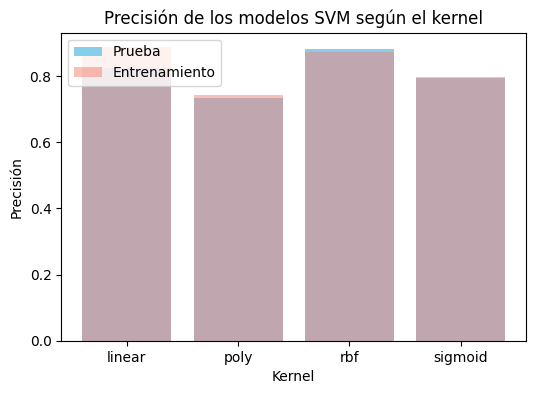

In [17]:
#Defino la variable objetivo
X = df_scaled.drop(columns=['income'])
y = df['income_class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=49, stratify=y
)

kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

precisions_test = []
precisions_train = []

for kernel in kernel_values:
    modelo = SVC(kernel=kernel)
    modelo.fit(X_train, y_train)
    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)
    precisions_test.append(accuracy_score(y_test, y_pred_test))
    precisions_train.append(accuracy_score(y_train, y_pred_train))

plt.figure(figsize=(6, 4))
plt.bar(kernel_values, precisions_test, color='skyblue')
plt.bar(kernel_values, precisions_train, color='salmon', alpha=0.5)
plt.xlabel('Kernel')
plt.ylabel('Precisión')
plt.title('Precisión de los modelos SVM según el kernel')
plt.legend(['Prueba', 'Entrenamiento'])
plt.show()


**- Selecciona el mejor kernel.**

In [20]:
best_kernel = kernel_values[precisions_test.index(max(precisions_test))]
print("Mejor kernel según la precisión:", best_kernel)

Mejor kernel según la precisión: rbf



### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el kernel seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [22]:
modelo = SVC(kernel='rbf')
modelo.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.88
Matriz de confusión:
[[11  0  1]
 [ 0  9  2]
 [ 0  1 10]]
Reporte de clasificación:
              precision    recall  f1-score   support

        Alto       1.00      0.92      0.96        12
        Bajo       0.90      0.82      0.86        11
       Medio       0.77      0.91      0.83        11

    accuracy                           0.88        34
   macro avg       0.89      0.88      0.88        34
weighted avg       0.89      0.88      0.88        34



<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Compara el modelo con otros algoritmos de clasificación vistos en clases anteriores.
</div>

Compararemos el modelo con KNN

In [25]:
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred_knn = modelo_knn.predict(X_test)

accuracy_knn = round(accuracy_score(y_test, y_pred_knn), 2)
print("Precisión del modelo kNN:", accuracy_knn)

print("\nMatriz de confusión kNN:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nReporte de clasificación kNN:")
print(classification_report(y_test, y_pred_knn))

Precisión del modelo kNN: 0.79

Matriz de confusión kNN:
[[11  0  1]
 [ 0  9  2]
 [ 2  2  7]]

Reporte de clasificación kNN:
              precision    recall  f1-score   support

        Alto       0.85      0.92      0.88        12
        Bajo       0.82      0.82      0.82        11
       Medio       0.70      0.64      0.67        11

    accuracy                           0.79        34
   macro avg       0.79      0.79      0.79        34
weighted avg       0.79      0.79      0.79        34



-Imprimo los resultados de precisión de SVM y KNN para comparar

In [28]:
print("Precisión SVM:", accuracy)
print("Precisión kNN:", accuracy_knn)

Precisión SVM: 0.88
Precisión kNN: 0.79


Comparando el desempeño de ambos modelos, con el mismo dataset, se puede obvservar que el modelo **SVM** con un kernel **"rbf"** alcanza mayor precisión, con un 0.88, en comparación con el modelo **KNN** con un 0.79

Observamos también que SVM presenta mejores valores en precisión, recall, f1-score, en la clase de ingreso alto, lo que indicaría una mejro capacidad de generalziación y menos confusión entre clases